# (04) rebuttal results: temp

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
# sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
# sys.path.insert(0, '/home/hadi/Dropbox/chkpts/pvae-source-code')
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

In [3]:
fig_dir = pjoin(fig_base_dir, 'rebuttal_aug')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

['temp.pdf', 'anneal_lin.pdf', 'logreg.pdf', 'anneal.pdf', 'anneal_exp.pdf', 'dim.pdf', 'samples_hist.pdf']

## Load df

In [4]:
df_temp = pjoin(tmp_dir, 'df_temp.df')
df_temp = pd.read_pickle(df_temp)

In [5]:
df_temp

,checkpoint,timestamp,dataset,type,enc_type,dec_type,n_dims,seed,kl_beta,n_params,...,active,mse,kl,kl_diag,mse_map,nelbo,temp_anneal,temp_start,temp_stop,hard_fwd
0,3000,"2024_08_01,00:59",vH16,poisson,conv,lin,512,1,1.0,1405596,...,0.871094,133.173660,31.708101,0.061928,101.352089,164.881760,exp,1.0,0.01,True
1,3000,"2024_08_01,13:16",vH16,poisson,conv,lin,512,1,1.0,1405596,...,0.863281,132.231888,33.646900,0.065716,99.123833,165.878784,exp,1.0,0.05,True
2,3000,"2024_08_02,01:52",vH16,poisson,conv,lin,512,1,1.0,1405596,...,0.869141,137.335327,32.383301,0.063249,104.854393,169.718628,exp,1.0,0.10,True
3,3000,"2024_08_04,11:35",vH16,poisson,conv,lin,512,1,1.0,1405596,...,0.861328,142.392090,30.576696,0.059720,111.747513,172.968781,exp,1.0,0.20,True
4,3000,"2024_08_01,00:19",vH16,poisson,conv,lin,512,1,1.0,1405596,...,0.855469,145.878998,29.263475,0.057156,116.659630,175.142471,exp,1.0,0.30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,3000,"2024_08_01,22:31",vH16,poisson,lin,lin,512,3,1.0,262656,...,0.990234,135.736328,32.581371,0.063632,98.454872,168.317703,lin,1.0,0.10,False
164,3000,"2024_08_02,11:28",vH16,poisson,lin,lin,512,3,1.0,262656,...,0.984375,134.755478,34.408092,0.067205,90.495003,169.163574,lin,1.0,0.20,False
165,3000,"2024_07_31,20:26",vH16,poisson,lin,lin,512,3,1.0,262656,...,0.986328,135.306686,36.072254,0.070454,83.521164,171.378937,lin,1.0,0.30,False
166,3000,"2024_08_01,10:10",vH16,poisson,lin,lin,512,3,1.0,262656,...,0.980469,137.384842,37.401817,0.073050,78.771820,174.786652,lin,1.0,0.40,False


## Make fig

In [6]:
dataset = 'vH16'
_pal = {'False': 'k', 'True': 'r'}

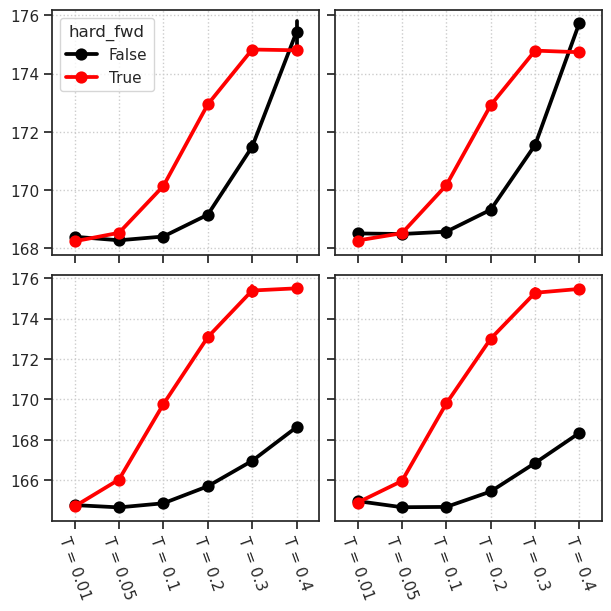

In [7]:
fig, axes = create_figure(2, 2, (6, 6), 'all', 'row')

for i, enc in enumerate(['lin', 'conv']):
    d2p = df_temp.loc[
        (df_temp['enc_type'] == enc) &
        (df_temp['temp_stop'] != 0.5) &
        (df_temp['dataset'] == dataset)
    ]
    for j, anneal in enumerate(['lin', 'exp']):
        sns.pointplot(
            data=d2p.loc[d2p['temp_anneal'] == anneal],
            x='temp_stop',
            y='nelbo',
            hue='hard_fwd',
            hue_order=_pal,
            palette=_pal,
            markers='o',
            linestyles='-',
            legend=True if
            i == j == 0 
            else False,
            ax=axes[i, j],
        )
xticklabels = axes.flat[-1].get_xticklabels()
xticklabels = [
    f"T = {float(t.get_text())}"
    for t in xticklabels
]
for ax in axes[1, :]:
    ax.set_xticklabels(xticklabels)
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=-70)
    ax.set(xlabel='', ylabel='')
    ax.grid()

fig.savefig(pjoin(fig_dir, 'temp.pdf'), **kws_fig)
plt.show()

In [8]:
d2p = df_temp.loc[
    (df_temp['enc_type'] == 'lin') &
    (df_temp['dataset'] == 'vH16')
]

In [9]:
d2p['enc_type'].value_counts()

enc_type
lin    84
Name: count, dtype: int64

In [10]:
d2p['temp_anneal'].value_counts()

temp_anneal
exp    42
lin    42
Name: count, dtype: int64

In [11]:
d2p['hard_fwd'].value_counts()

hard_fwd
True     42
False    42
Name: count, dtype: int64

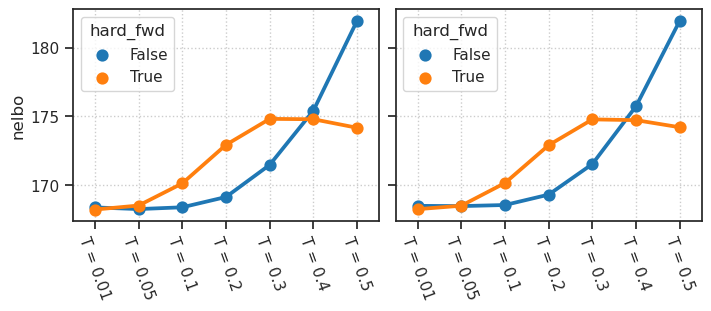

In [12]:
_pal = {'False': 'C0', 'True': 'C1'}
fig, axes = create_figure(1, 2, (7, 3), 'all', 'all')

sns.pointplot(
    data=d2p.loc[d2p['temp_anneal'] == 'lin'],
    x='temp_stop',
    y='nelbo',
    hue='hard_fwd',
    hue_order=_pal,
    palette=_pal,
    markers='o',
    linestyles='-',
    ax=axes[0],
)
sns.pointplot(
    data=d2p.loc[d2p['temp_anneal'] == 'exp'],
    x='temp_stop',
    y='nelbo',
    hue='hard_fwd',
    hue_order=_pal,
    palette=_pal,
    markers='o',
    linestyles='-',
    ax=axes[1],
)
xticklabels = axes[-1].get_xticklabels()
xticklabels = [
    f"T = {float(t.get_text())}"
    for t in xticklabels
]
axes[-1].set_xticklabels(xticklabels)
axes[-1].set_ylabel('')
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=-70)
    ax.set_xlabel('')
    ax.grid()
plt.show()

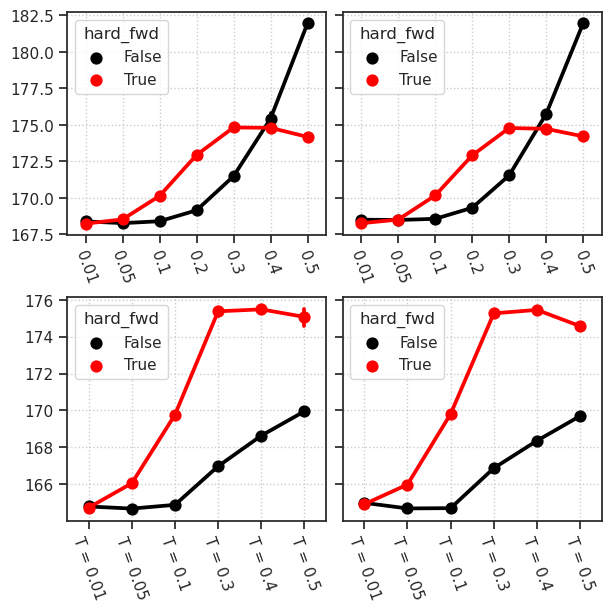